In [1]:
from pathlib import Path
import sys
sys.path.append('../')
from pma_open import *

#My image
image_path = "hel1_Avg_Frame/hel1_Avg_Frame.png"
image = io.imread(image_path, as_gray=True)

#Image on dropbox
hel1_ave_path = '../Dropbox Files/hel1_ave_LF_Circ.tif'
hel1_ave_image = io.imread(hel1_ave_path)

#Testing avg_frame_arr function
file_path = '../Dropbox Files/hel1.pma'
avg_frame_data = avg_frame_arr(file_path)

#Chanel arrays
avg_frame_data_CH1 = avg_frame_data[:,:256]
avg_frame_data_CH2 = avg_frame_data[:,256:]

#Chanel image paths
CH1_img_path = "hel1_Avg_Frame/hel1_Avg_Frame_CH1.png"
CH2_img_path = "hel1_Avg_Frame/hel1_Avg_Frame_CH2.png"

#Chanel images
image_CH1 = io.imread(CH1_img_path, as_gray=True)
image_CH2 = io.imread(CH2_img_path, as_gray=True)

Image Size: 512 x 512
Sucessfully generated average frame


Number of peaks identified in CH1: 56
Number of peaks identified in CH2: 66


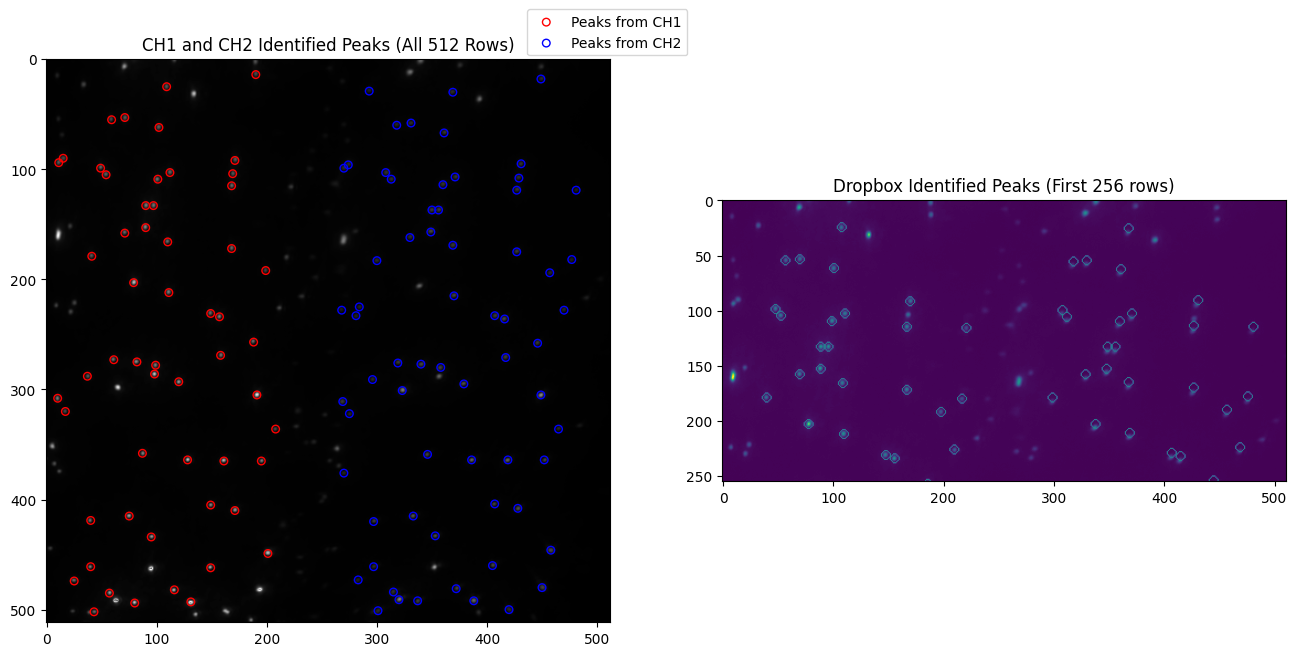

In [2]:
peaks_coords_IDL_CH1 = find_peaks_scipy_IDL(CH1_img_path)[0]
peaks_coords_IDL_CH2_new = find_peaks_scipy_IDL(CH2_img_path, sigma=2, block_size=16, scaler_percent=10)[0]

good_peaks_1,_ = good_peak_finder(CH1_img_path)
good_peaks_2_new,_ = good_peak_finder(CH2_img_path, sigma=2, block_size=16, scaler_percent=10, boarder=10, max_rad=3)

# Move good_peaks_1 to CH2 to display full image
good_peaks_1_CH2 = shift_peaks(good_peaks_1)
good_peaks_2_CH2 = shift_peaks(good_peaks_2_new)

#All in one image!
print(f"Number of peaks identified in CH1: {len(good_peaks_1)}")
print(f"Number of peaks identified in CH2: {len(good_peaks_2_CH2)}")

f, axes = plt.subplots(1, 2, figsize=(16, 24))
axes[0].set_title("CH1 and CH2 Identified Peaks (All 512 Rows)")
axes[0].imshow(image, cmap="gray")
scat1= axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=30, facecolors='none', edgecolors='r', label='Peaks from CH1')
scat2= axes[0].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=30, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.15, 1.1))

axes[1].set_title("Dropbox Identified Peaks (First 256 rows)")
axes[1].imshow(hel1_ave_image)
plt.show()

# PolyMap

# Using peaks from manually found pairs (degree =2, similar to IDL)
#### CH1_Peak50 (y, x):(14,190), CH2_Peak49 (y, x):(18,449)
#### CH1_Peak26 (y, x):(308,10), CH2_Peak29 (y, x):(311,269)
#### CH1_Peak0 (y, x):(493,131), CH2_Peak3 (y, x):(492,388)


X-Mapping Parameters: [2.80151282e-04 9.43969744e-01 2.59532287e+02]
Y-Mapping Parameters: [-3.80381233e-05  1.00884692e+00  3.88359866e+00]


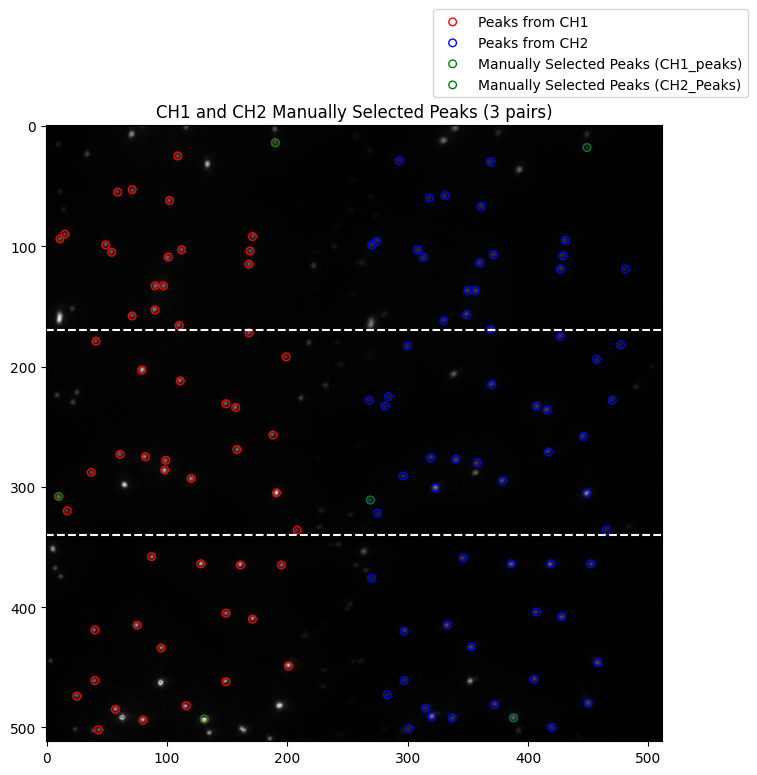

In [3]:
CH1_peaks_3 = np.array([[14, 190], [308, 10], [493, 131]])
CH2_peaks_3 = np.array([[18, 449], [311, 269], [492, 388]])

params_x_man_3, params_y_man_3 = find_polyfit_params(CH1_peaks_3, CH2_peaks_3, degree=2)

print("X-Mapping Parameters:", params_x_man_3)
print("Y-Mapping Parameters:", params_y_man_3)

plt.figure(figsize=(8, 8))
plt.title("CH1 and CH2 Manually Selected Peaks (3 pairs)")
plt.imshow(image, cmap="gray")
plt.axhline(y= 170, color='w', linestyle='--')  
plt.axhline(y= 340, color='w', linestyle='--')
plt.scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=30, facecolors='none', edgecolors='r', label='Peaks from CH1')
plt.scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=30, facecolors='none', edgecolors='b', label='Peaks from CH2')
plt.scatter(CH1_peaks_3[:, 1], CH1_peaks_3[:, 0], s=30, facecolors='none', edgecolors='g', label='Manually Selected Peaks (CH1_peaks)')
plt.scatter(CH2_peaks_3[:, 1], CH2_peaks_3[:, 0], s=30, facecolors='none', edgecolors='g', label='Manually Selected Peaks (CH2_Peaks)')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.2))

plt.show()

In [4]:
# apply mapping function to all CH1 peaks
# if the CH1 peak does not map to CH2 with 1 pixel then we discard it from CH1
# if CH2 peaks are not mapped onto then discard the peak
mapped_peaks_3 = apply_polyfit_params(good_peaks_1, params_x_man_3, params_y_man_3).astype(np.uint16)
print(f"Number of mapped peaks: {len(mapped_peaks_3)}")

Number of mapped peaks: 56


In [5]:
poly_pair_count_3, poly_pair_arr_CH1_3,poly_pair_arr_CH2_3 = find_pairs(mapped_peaks_3, good_peaks_1)
poly_pair_count_tol2_3,poly_pair_arr_CH1_tol2_3,poly_pair_arr_CH2_tol2_3  = find_pairs(mapped_peaks_3, good_peaks_1, tolerance=2)
poly_pair_count_tol3_3,poly_pair_arr_CH1_tol3_3,poly_pair_arr_CH2_tol3_3 = find_pairs(mapped_peaks_3, good_peaks_1, tolerance=3)
poly_pair_count_tol4_3,poly_pair_arr_CH1_tol4_3,poly_pair_arr_CH2_tol4_3  = find_pairs(mapped_peaks_3, good_peaks_1, tolerance=4)


print(f"Number of Polynomial pairs (tolerance=1): {poly_pair_count_3}")
print(f"Number of Polynomial pairs (tolerance=2): {poly_pair_count_tol2_3}")
print(f"Number of Polynomial pairs (tolerance=3): {poly_pair_count_tol3_3}")
print(f"Number of Polynomial pairs (tolerance=4): {poly_pair_count_tol4_3}")

Number of Polynomial pairs (tolerance=1): 9
Number of Polynomial pairs (tolerance=2): 17
Number of Polynomial pairs (tolerance=3): 32
Number of Polynomial pairs (tolerance=4): 56


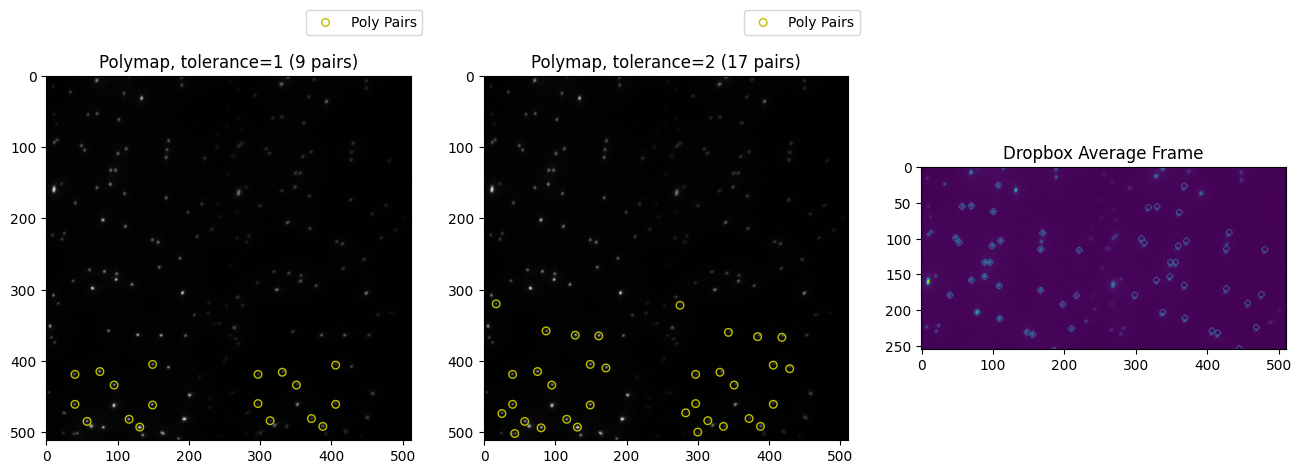

In [6]:
#Nb. edit to display the poly pairs in yellow
fig, axes = plt.subplots(1, 3, figsize=(16, 48))

axes[0].imshow(image, cmap="gray")
axes[0].set_title(f"Polymap, tolerance=1 ({poly_pair_count_3} pairs)")
# axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
# axes[0].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[0].scatter(poly_pair_arr_CH1_3[:, 1], poly_pair_arr_CH1_3[:, 0], s=30, facecolors='none', edgecolors='y', label='Poly Pairs')
axes[0].scatter(poly_pair_arr_CH2_3[:, 1], poly_pair_arr_CH2_3[:, 0], s=30, facecolors='none', edgecolors='y')   
axes[0].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))  

axes[1].imshow(image, cmap="gray")
axes[1].set_title(f"Polymap, tolerance=2 ({poly_pair_count_tol2_3} pairs)")
# axes[1].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
# axes[1].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[1].scatter(poly_pair_arr_CH1_tol2_3[:, 1], poly_pair_arr_CH1_tol2_3[:, 0], s=30, facecolors='none', edgecolors='y', label='Poly Pairs')
axes[1].scatter(poly_pair_arr_CH2_tol2_3[:, 1], poly_pair_arr_CH2_tol2_3[:, 0], s=30, facecolors='none', edgecolors='y')   
axes[1].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))    
    
axes[2].imshow(hel1_ave_image)
axes[2].set_title("Dropbox Average Frame")
plt.show()


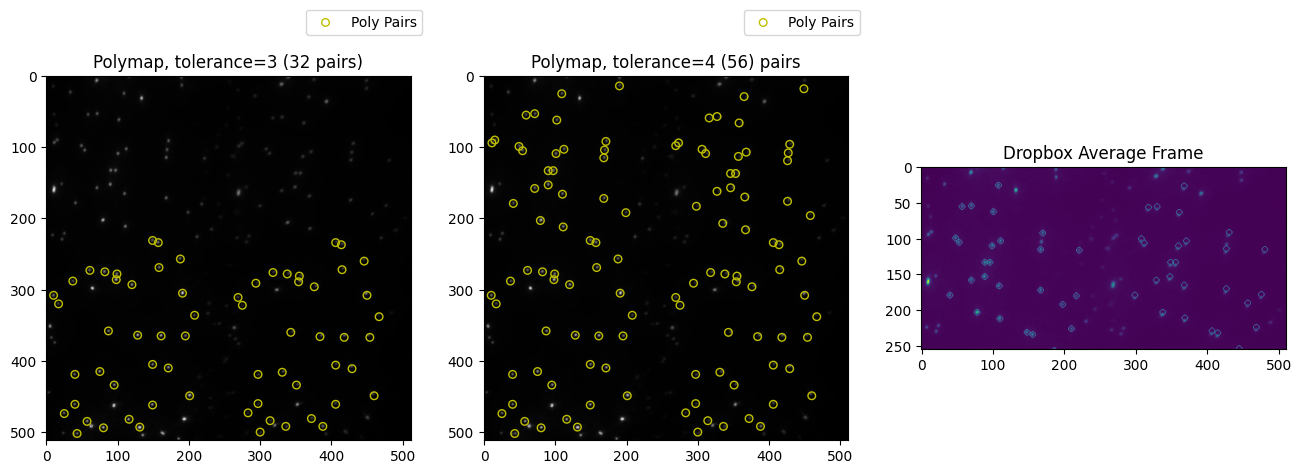

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(16, 48))
axes[0].imshow(image, cmap="gray")
axes[0].set_title(f"Polymap, tolerance=3 ({poly_pair_count_tol3_3} pairs)")
# axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
# axes[0].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[0].scatter(poly_pair_arr_CH1_tol3_3[:, 1], poly_pair_arr_CH1_tol3_3[:, 0], s=30, facecolors='none', edgecolors='y', label='Poly Pairs')
axes[0].scatter(poly_pair_arr_CH2_tol3_3[:, 1], poly_pair_arr_CH2_tol3_3[:, 0], s=30, facecolors='none', edgecolors='y')   
axes[0].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))    

axes[1].imshow(image, cmap="gray")
axes[1].set_title(f"Polymap, tolerance=4 ({poly_pair_count_tol4_3}) pairs")
# axes[1].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
# axes[1].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[1].scatter(poly_pair_arr_CH1_tol4_3[:, 1], poly_pair_arr_CH1_tol4_3[:, 0], s=30, facecolors='none', edgecolors='y', label='Poly Pairs')
axes[1].scatter(poly_pair_arr_CH2_tol4_3[:, 1], poly_pair_arr_CH2_tol4_3[:, 0], s=30, facecolors='none', edgecolors='y')   
axes[1].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))

axes[2].imshow(hel1_ave_image)
axes[2].set_title("Dropbox Average Frame")
plt.show()

In [8]:
print(f"Length of CH1 tolerance=4 (3pair): {len(poly_pair_arr_CH1_tol4_3)}")
print(f"Length of CH2 tolerance=4 (3pair): {len(poly_pair_arr_CH2_tol4_3)}")

Length of CH1 tolerance=4 (3pair): 56
Length of CH2 tolerance=4 (3pair): 56


# Continued by manually selecting 5 pairs
#### CH1_Peak50 (y, x):(14,190), CH2_Peak49 (y, x):(18,449)
#### CH1_Peak26 (y, x):(308,10), CH2_Peak29 (y, x):(311,269)
#### CH1_Peak0 (y, x):(493,131), CH2_Peak3 (y, x):(492,388)
#### CH1_Peak35 (y, x):(115,168), CH2_Peak34 (y, x):(119,427)
#### CH1_Peak29 (y, x):(273,61), CH2_Peak32 (y, x):(276,319)

In [9]:
CH1_peaks_5 = np.array([[14, 190], [308, 10], [493, 131], [115, 168], [273, 61]])
CH2_peaks_5 = np.array([[18, 449], [311, 269], [492, 388], [119, 427], [276, 319]])


params_x_man_5, params_y_man_5 = find_polyfit_params(CH1_peaks_5, CH2_peaks_5, degree=3)
mapped_peaks_experiment_5 = apply_polyfit_params(CH1_peaks_5, params_x_man_5, params_y_man_5).astype(np.uint16)

print("X-Mapping Parameters:", params_x_man_5)
print("Y-Mapping Parameters:", params_y_man_5)

X-Mapping Parameters: [6.30325364e-07 3.37535217e-05 9.70609798e-01 2.59341246e+02]
Y-Mapping Parameters: [-4.61247627e-08  2.85629193e-06  9.99633922e-01  4.02144922e+00]


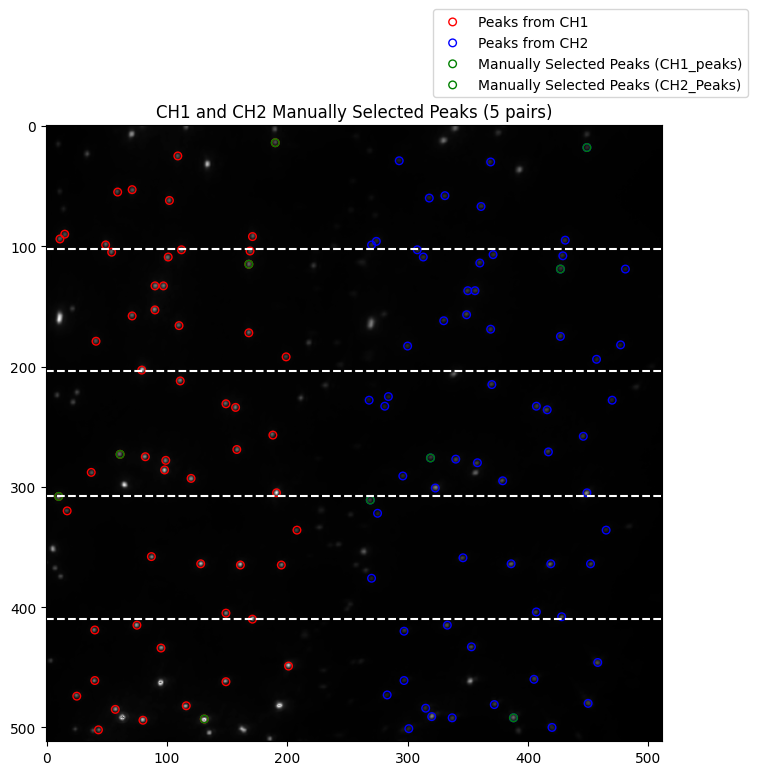

In [10]:
plt.figure(figsize=(8, 8))
plt.title("CH1 and CH2 Manually Selected Peaks (5 pairs)")
plt.imshow(image, cmap="gray")
plt.axhline(y= 102, color='w', linestyle='--')  
plt.axhline(y= 204, color='w', linestyle='--')
plt.axhline(y= 308, color='w', linestyle='--')
plt.axhline(y= 410, color='w', linestyle='--')
plt.scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=30, facecolors='none', edgecolors='r', label='Peaks from CH1')
plt.scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=30, facecolors='none', edgecolors='b', label='Peaks from CH2')
plt.scatter(CH1_peaks_5[:, 1], CH1_peaks_5[:, 0], s=30, facecolors='none', edgecolors='g', label='Manually Selected Peaks (CH1_peaks)')
plt.scatter(CH2_peaks_5[:, 1], CH2_peaks_5[:, 0], s=30, facecolors='none', edgecolors='g', label='Manually Selected Peaks (CH2_Peaks)')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.2))

plt.show()

In [11]:
mapped_peaks_5 = apply_polyfit_params(good_peaks_1, params_x_man_5, params_y_man_5).astype(np.uint16)

poly_pair_count_5, poly_pair_arr_CH1_5, poly_pair_arr_CH2_5 = find_pairs(mapped_peaks_5, good_peaks_1)
poly_pair_count_tol2_5, poly_pair_arr_CH1_tol2_5, poly_pair_arr_CH2_tol2_5 = find_pairs(mapped_peaks_5, good_peaks_1, tolerance=2)
poly_pair_count_tol3_5, poly_pair_arr_CH1_tol3_5, poly_pair_arr_CH2_tol3_5  = find_pairs(mapped_peaks_5, good_peaks_1, tolerance=3)
poly_pair_count_tol4_5,poly_pair_arr_CH1_tol4_5, poly_pair_arr_CH2_tol4_5 = find_pairs(mapped_peaks_5, good_peaks_1, tolerance=4)

print(f"Number of Polynomial pairs (tolerance=1): {poly_pair_count_5}")
print(f"Number of Polynomial pairs (tolerance=2): {poly_pair_count_tol2_5}")
print(f"Number of Polynomial pairs (tolerance=3): {poly_pair_count_tol3_5}")
print(f"Number of Polynomial pairs (tolerance=4): {poly_pair_count_tol4_5}")

Number of Polynomial pairs (tolerance=1): 7
Number of Polynomial pairs (tolerance=2): 18
Number of Polynomial pairs (tolerance=3): 51
Number of Polynomial pairs (tolerance=4): 56


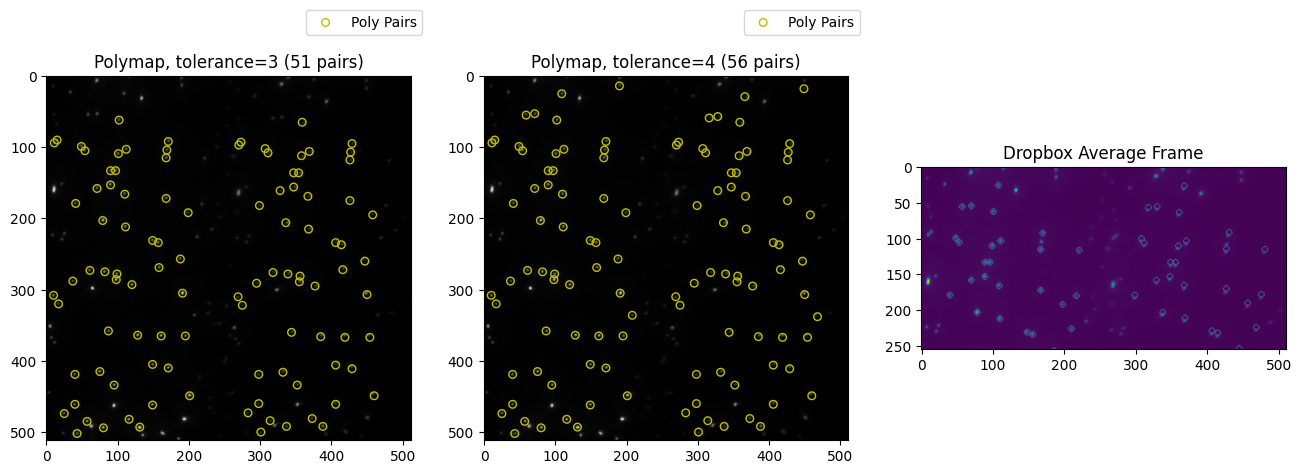

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(16, 48))
axes[0].imshow(image, cmap="gray")
axes[0].set_title(f"Polymap, tolerance=3 ({poly_pair_count_tol3_5} pairs)")
# axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
# axes[0].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[0].scatter(poly_pair_arr_CH1_tol3_5[:, 1], poly_pair_arr_CH1_tol3_5[:, 0], s=30, facecolors='none', edgecolors='y', label='Poly Pairs')
axes[0].scatter(poly_pair_arr_CH2_tol3_5[:, 1], poly_pair_arr_CH2_tol3_5[:, 0], s=30, facecolors='none', edgecolors='y')   
axes[0].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))    

axes[1].imshow(image, cmap="gray")
axes[1].set_title(f"Polymap, tolerance=4 ({poly_pair_count_tol4_5} pairs)")
# axes[1].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
# axes[1].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[1].scatter(poly_pair_arr_CH1_tol4_5[:, 1], poly_pair_arr_CH1_tol4_5[:, 0], s=30, facecolors='none', edgecolors='y', label='Poly Pairs')
axes[1].scatter(poly_pair_arr_CH2_tol4_5[:, 1], poly_pair_arr_CH2_tol4_5[:, 0], s=30, facecolors='none', edgecolors='y')   
axes[1].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))

axes[2].imshow(hel1_ave_image)
axes[2].set_title("Dropbox Average Frame")
plt.show()

In [13]:
##### Still issue of close peaks being doubly mapped in CH2 for tolerance = 4 (see 100, 150). 
print(f"Length of CH1 tolerance=4 (5pair): {len(poly_pair_arr_CH1_tol4_5)}")
print(f"Length of CH2 tolerance=4 (5pair): {len(poly_pair_arr_CH2_tol4_5)}")

Length of CH1 tolerance=4 (5pair): 56
Length of CH2 tolerance=4 (5pair): 56


# Proceed with tolerance = 3, manually selecting 6 peak pairs

#### CH1_Peak45 (y, x):(25,109), CH2_Peak42 (y, x):(30,369)
#### CH1_Peak40 (y, x):(257,188), CH2_Peak28 (y, x):(258,446)
#### CH1_Peak34 (y, x):(502,43), CH2_Peak48 (y, x):(501,301)
#### CH1_Peak50 (y, x):(14,190), CH2_Peak49 (y, x):(18,449)
#### CH1_Peak26 (y, x):(308,10), CH2_Peak29 (y, x):(311,269)
#### CH1_Peak0 (y, x):(493,131), CH2_Peak3 (y, x):(492,388)


In [14]:
CH1_peaks_6 = np.array([[14, 190], [308, 10], [493, 131], [25, 109], [257, 188], [502, 43]])
CH2_peaks_6 = np.array([[18, 449], [311, 269], [492, 388], [30, 369], [258, 446], [501, 301]])
params_x_man_6, params_y_man_6 = find_polyfit_params(CH1_peaks_6, CH2_peaks_6, degree=3)
mapped_peaks_experiment_6 = apply_polyfit_params(CH1_peaks_6, params_x_man_6, params_y_man_6).astype(np.uint16)

print("X-Mapping Parameters:", params_x_man_6)
print("Y-Mapping Parameters:", params_y_man_6)

X-Mapping Parameters: [ 3.70716045e-07 -9.20493451e-05  1.00272486e+00  2.58708555e+02]
Y-Mapping Parameters: [-5.32978922e-07  4.15968733e-04  9.10940089e-01  6.02028717e+00]


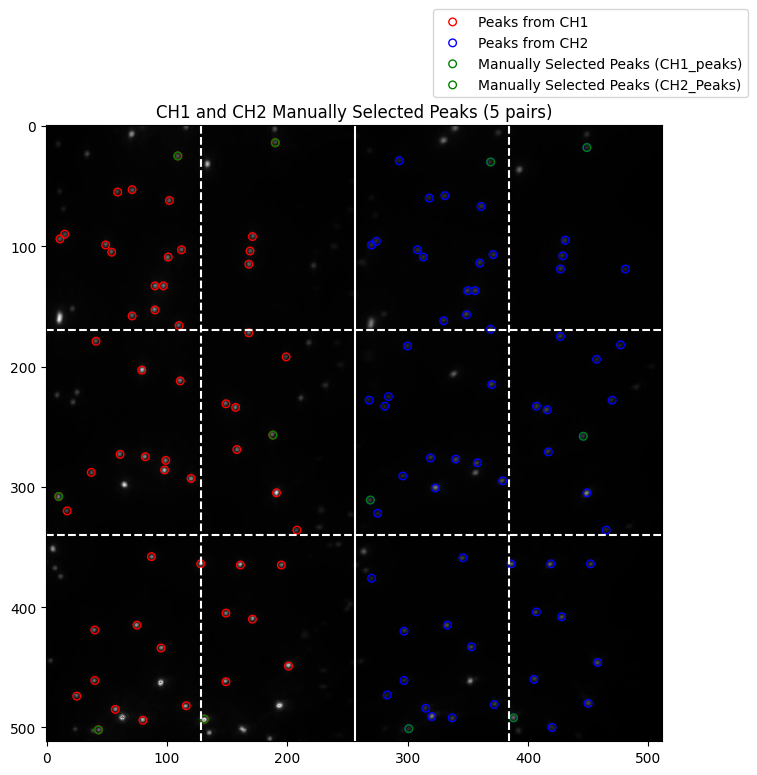

In [15]:
plt.figure(figsize=(8, 8))
plt.title("CH1 and CH2 Manually Selected Peaks (5 pairs)")
plt.imshow(image, cmap="gray")
plt.axhline(y= 170, color='w', linestyle='--')  
plt.axhline(y= 340, color='w', linestyle='--')
plt.axvline(x= 128, color='w', linestyle='--')
plt.axvline(x= 384, color='w', linestyle='--')
plt.axvline(x= 256, color='w', linestyle='-')
plt.scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=30, facecolors='none', edgecolors='r', label='Peaks from CH1')
plt.scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=30, facecolors='none', edgecolors='b', label='Peaks from CH2')
plt.scatter(CH1_peaks_6[:, 1], CH1_peaks_6[:, 0], s=30, facecolors='none', edgecolors='g', label='Manually Selected Peaks (CH1_peaks)')
plt.scatter(CH2_peaks_6[:, 1], CH2_peaks_6[:, 0], s=30, facecolors='none', edgecolors='g', label='Manually Selected Peaks (CH2_Peaks)')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.2))

plt.show()

In [16]:
mapped_peaks_6 = apply_polyfit_params(good_peaks_1, params_x_man_6, params_y_man_6).astype(np.uint16)

poly_pair_count_6, poly_pair_arr_CH1_6, poly_pair_arr_CH2_6  = find_pairs(mapped_peaks_6, good_peaks_1)
poly_pair_count_tol2_6, poly_pair_arr_CH1_tol2_6, poly_pair_arr_CH2_tol2_6 = find_pairs(mapped_peaks_6, good_peaks_1, tolerance=2)
poly_pair_count_tol3_6, poly_pair_arr_CH1_tol3_6, poly_pair_arr_CH2_tol3_6 = find_pairs(mapped_peaks_6, good_peaks_1, tolerance=3)
poly_pair_count_tol4_6, poly_pair_arr_CH1_tol4_6, poly_pair_arr_CH2_tol4_6 = find_pairs(mapped_peaks_6, good_peaks_1, tolerance=4)

print(f"Number of Polynomial pairs (tolerance=1): {poly_pair_count_6}")
print(f"Number of Polynomial pairs (tolerance=2): {poly_pair_count_tol2_6}")
print(f"Number of Polynomial pairs (tolerance=3): {poly_pair_count_tol3_6}")
print(f"Number of Polynomial pairs (tolerance=4): {poly_pair_count_tol4_6}")

Number of Polynomial pairs (tolerance=1): 0
Number of Polynomial pairs (tolerance=2): 51
Number of Polynomial pairs (tolerance=3): 54
Number of Polynomial pairs (tolerance=4): 56


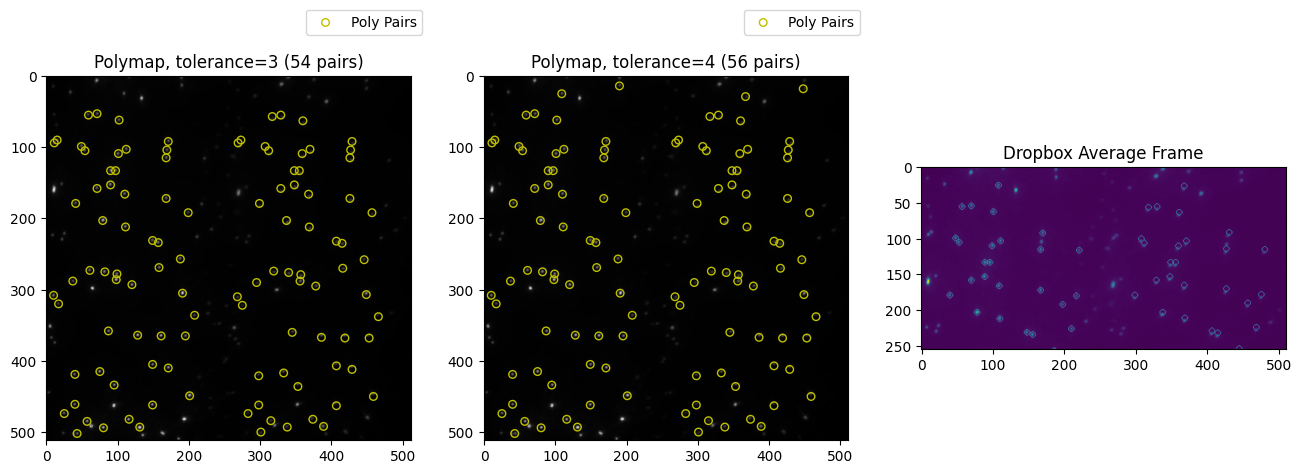

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(16, 48))
axes[0].imshow(image, cmap="gray")
axes[0].set_title(f"Polymap, tolerance=3 ({poly_pair_count_tol3_6} pairs)")
# axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
# axes[0].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[0].scatter(poly_pair_arr_CH1_tol3_6[:, 1], poly_pair_arr_CH1_tol3_6[:, 0], s=30, facecolors='none', edgecolors='y', label='Poly Pairs')
axes[0].scatter(poly_pair_arr_CH2_tol3_6[:, 1], poly_pair_arr_CH2_tol3_6[:, 0], s=30, facecolors='none', edgecolors='y')   
axes[0].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))    

axes[1].imshow(image, cmap="gray")
axes[1].set_title(f"Polymap, tolerance=4 ({poly_pair_count_tol4_6} pairs)")
# axes[1].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
# axes[1].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[1].scatter(poly_pair_arr_CH1_tol4_6[:, 1], poly_pair_arr_CH1_tol4_6[:, 0], s=30, facecolors='none', edgecolors='y', label='Poly Pairs')
axes[1].scatter(poly_pair_arr_CH2_tol4_6[:, 1], poly_pair_arr_CH2_tol4_6[:, 0], s=30, facecolors='none', edgecolors='y')   
axes[1].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))

axes[2].imshow(hel1_ave_image)
axes[2].set_title("Dropbox Average Frame")
plt.show()

In [18]:
#### The 6 pair mapping does worse !! A lot of peaks are being missed!!
print(f"Length of CH1 tolerance=4 (6pair): {len(poly_pair_arr_CH1_tol4_6)}")
print(f"Length of CH2 tolerance=4 (6pair): {len(poly_pair_arr_CH2_tol4_6)}")

Length of CH1 tolerance=4 (6pair): 56
Length of CH2 tolerance=4 (6pair): 56


# Selecting 10 pairs
#### CH1_Peak50 (y, x):(14,190), CH2_Peak49 (y, x):(18,449)
#### CH1_Peak26 (y, x):(308,10), CH2_Peak29 (y, x):(311,269)
#### CH1_Peak0 (y, x):(493,131), CH2_Peak3 (y, x):(492,388)
#### CH1_Peak35 (y, x):(115,168), CH2_Peak34 (y, x):(119,427)
#### CH1_Peak29 (y, x):(273,61), CH2_Peak32 (y, x):(276,319)
#### CH1_Peak52 (y, x):(55,59), CH2_Peak55 (y, x):(60,318)
#### CH1_Peak44 (y, x):(179,41), CH2_Peak46 (y, x):(183,300)
#### CH1_Peak20 (y, x):(234,157), CH2_Peak11 (y, x):(236,416)
#### CH1_Peak7 (y, x):(365,161), CH2_Peak5 (y, x):(364,419)
#### CH1_Peak34 (y, x):(502,43), CH2_Peak48 (y, x):(501,301)

In [19]:
CH1_peaks_10= np.array([[14, 190], [308, 10], [493, 131], [115, 168], [273, 61], [55, 59], [179, 41], [234, 157], [365, 161], [502, 43]])
CH2_peaks_10 = np.array([[18, 449], [311, 269], [492, 388], [119, 427], [276, 319], [60, 318], [183, 300], [236, 416], [364, 419], [501, 301]])

params_x_man_10, params_y_man_10 = find_polyfit_params(CH1_peaks_10, CH2_peaks_10, degree=3)


print("X-Mapping Parameters:", params_x_man_10)
print("Y-Mapping Parameters:", params_y_man_10)

X-Mapping Parameters: [ 9.35187742e-07 -1.12471318e-04  9.88364629e-01  2.59193329e+02]
Y-Mapping Parameters: [ 1.51364740e-07 -1.34184697e-04  1.01935559e+00  3.85527254e+00]


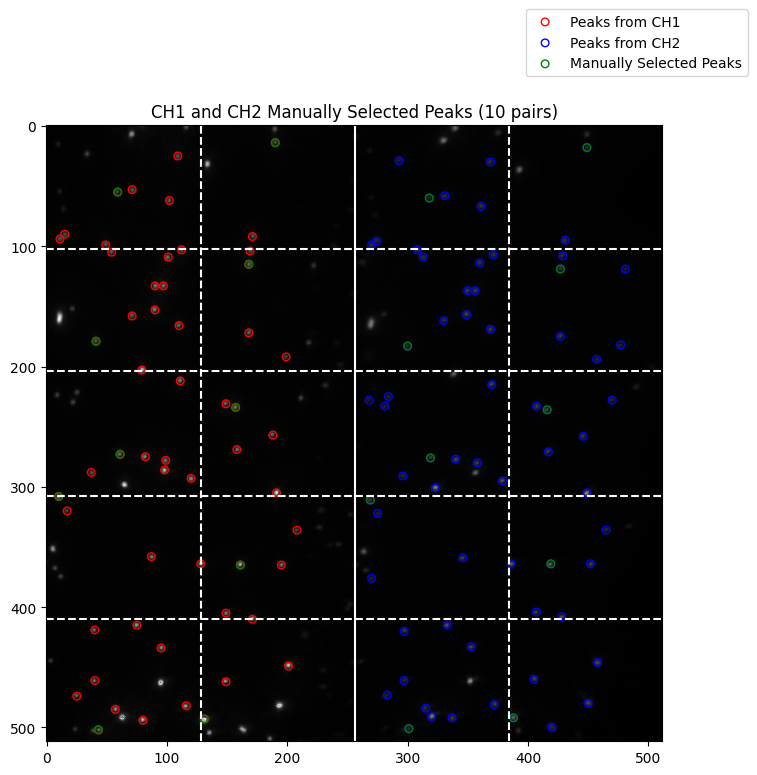

In [20]:
plt.figure(figsize=(8, 8))
plt.title("CH1 and CH2 Manually Selected Peaks (10 pairs)")
plt.imshow(image, cmap="gray")
plt.axhline(y= 102, color='w', linestyle='--')  
plt.axhline(y= 204, color='w', linestyle='--')
plt.axhline(y= 308, color='w', linestyle='--')
plt.axhline(y= 410, color='w', linestyle='--')

plt.axvline(x= 128, color='w', linestyle='--')
plt.axvline(x= 384, color='w', linestyle='--')

plt.axvline(x= 256, color='w', linestyle='-')
plt.scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=30, facecolors='none', edgecolors='r', label='Peaks from CH1')
plt.scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=30, facecolors='none', edgecolors='b', label='Peaks from CH2')
plt.scatter(CH1_peaks_10[:, 1], CH1_peaks_10[:, 0], s=30, facecolors='none', edgecolors='g', label='Manually Selected Peaks')
plt.scatter(CH2_peaks_10[:, 1], CH2_peaks_10[:, 0], s=30, facecolors='none', edgecolors='g')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.2))

plt.show()

In [21]:
mapped_peaks_10 = apply_polyfit_params(good_peaks_1, params_x_man_10, params_y_man_10).astype(np.uint16)
poly_pair_count_10, poly_pair_arr_CH1_10, poly_pair_arr_CH2_10 = find_pairs(mapped_peaks_10, good_peaks_1)
poly_pair_count_tol2_10, poly_pair_arr_CH1_tol2_10, poly_pair_arr_CH2_tol2_10 = find_pairs(mapped_peaks_10, good_peaks_1, tolerance=2)
poly_pair_count_tol3_10, poly_pair_arr_CH1_tol3_10, poly_pair_arr_CH2_tol3_10 = find_pairs(mapped_peaks_10, good_peaks_1, tolerance=3)
poly_pair_count_tol4_10, poly_pair_arr_CH1_tol4_10, poly_pair_arr_CH2_tol4_10 = find_pairs(mapped_peaks_10, good_peaks_1, tolerance=4)

print(f"Number of Polynomial pairs (tolerance=1): {poly_pair_count_10}")
print(f"Number of Polynomial pairs (tolerance=2): {poly_pair_count_tol2_10}")
print(f"Number of Polynomial pairs (tolerance=3): {poly_pair_count_tol3_10}")
print(f"Number of Polynomial pairs (tolerance=4): {poly_pair_count_tol4_10}")

Number of Polynomial pairs (tolerance=1): 5
Number of Polynomial pairs (tolerance=2): 25
Number of Polynomial pairs (tolerance=3): 37
Number of Polynomial pairs (tolerance=4): 56


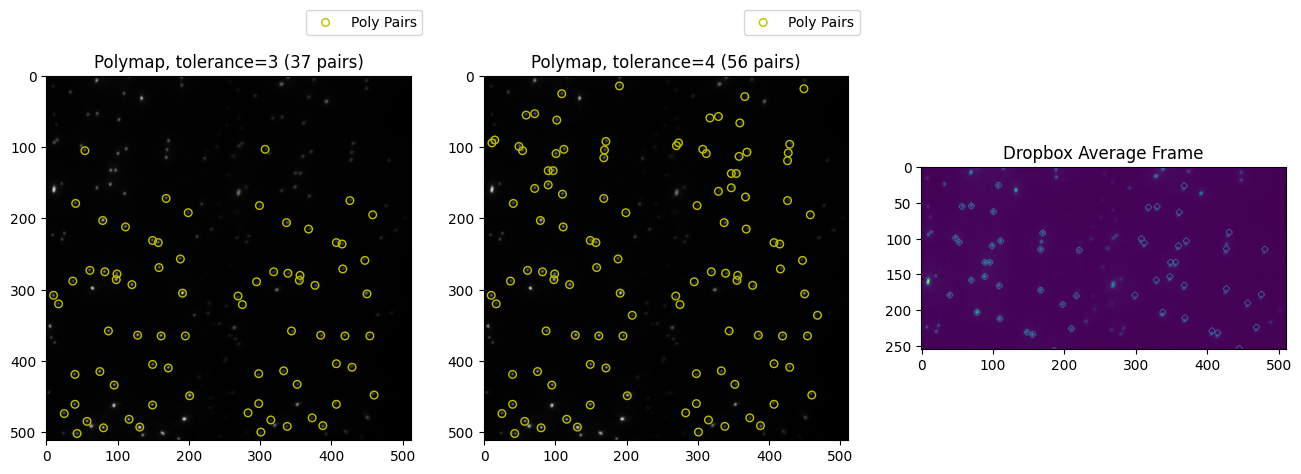

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(16, 48))
axes[0].imshow(image, cmap="gray")
axes[0].set_title(f"Polymap, tolerance=3 ({poly_pair_count_tol3_10} pairs)")
# axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
# axes[0].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[0].scatter(poly_pair_arr_CH1_tol3_10[:, 1], poly_pair_arr_CH1_tol3_10[:, 0], s=30, facecolors='none', edgecolors='y', label='Poly Pairs')
axes[0].scatter(poly_pair_arr_CH2_tol3_10[:, 1], poly_pair_arr_CH2_tol3_10[:, 0], s=30, facecolors='none', edgecolors='y')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))

axes[1].imshow(image, cmap="gray")
axes[1].set_title(f"Polymap, tolerance=4 ({poly_pair_count_tol4_10} pairs)")
# axes[1].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
# axes[1].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[1].scatter(poly_pair_arr_CH1_tol4_10[:, 1], poly_pair_arr_CH1_tol4_10[:, 0], s=30, facecolors='none', edgecolors='y', label='Poly Pairs')
axes[1].scatter(poly_pair_arr_CH2_tol4_10[:, 1], poly_pair_arr_CH2_tol4_10[:, 0], s=30, facecolors='none', edgecolors='y')
axes[1].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))

axes[2].imshow(hel1_ave_image)
axes[2].set_title("Dropbox Average Frame")
plt.show()
